# <center>Lecture 2. Visualization with Python


Working with data is always accompanied with data visualization. You need to explore the data, fill gaps, find outliers and prepare your dataset for working with machine learning algorithms. It's not just about making beautiful visualizations, it's about a complex task of data investigation. We use graphs for data analytics before building any model and also we analyze model performance with graphs and metrics. In this article we are going to get experience with popular graphical libraries such as pandas, seaborn and matplotlib.

### Agenda

1. Preparation
2. Single Features
    * 2.1 Quantitative features
    * 2.2 Categorical and binary features
3. Multivariant visualization
    * 3.1 Quantitative–Quantitative
    * 3.2 Quantitative–Categorical
    * 3.3 Categorical–Categorical


In [4]:
#As in previous lesson we import pandas library
import pandas as pd
# and matplotlib library
from matplotlib import pyplot as plt

In [5]:
# import new library seaborn, you could install it via pip
import seaborn as sns

In [6]:
#set property to build graphics inside jupyter-notebook
%matplotlib inline

## Loading dataset on Customer churn for telecom operator

In [7]:
!pwd

/home/jovyan/__DATA/BABD_Fall_2022/lectures


In [8]:
# read dataset from file and save it in new variable
df = pd.read_csv('/home/jovyan/__DATA/PMDM2022_Spring/data/telecom_churn.csv')

Let's look at the first 5 values with the head method.

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models which will predict this feature based on the remaining features. This is why we call it a *target*.

# 2. Single Features

Univariate analysis allows us to research one feature from different sides. We analyze features without any dependencies and investigate the distribution of its values.


### 2.1 Quantitative features
Quantitative features take on ordered numerical values, are the most popular features in the dataset. Those values can be discrete, like integers, or continuous, like real numbers



#### Histograms and density plots
The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().

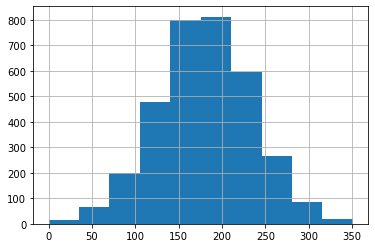

In [7]:
df['Total day minutes'].hist();

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.
In the above plot, we see that the variable Total day minutes is normally distributed

## Boxplot

A very useful type of plot is boxplot, Seaborn library allows us to build this type of plot.
The left line of the box on the plot shows us 25% quantile, the medium line shows 50% quantile or median value,  the right line of the box - 75% quantile, all points which are out of left and right lines (or out of "whiskers") are outliers in the dataset.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


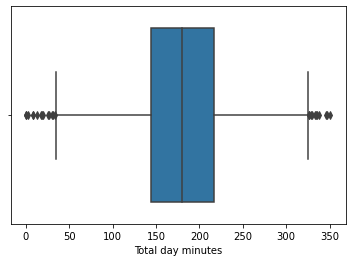

In [8]:
sns.boxplot(df['Total day minutes']);

Let's look at statistical info about the dataset and its features.

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 2.2 Categorical and binary features

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

"State" is an example of categorical feature. Let's look at the most popular states in the dataset.

In [10]:
# value counts return quantity of unique values for feature 'State'
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

The same task could be applied for binary features.

In [11]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Seaborn allows us to visualize it with the countplot() method

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


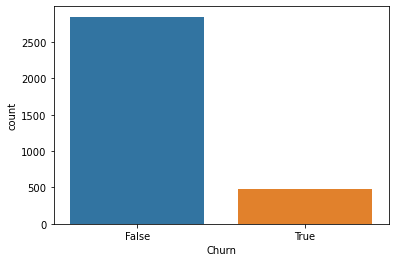

In [12]:
sns.countplot(df['Churn']);

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


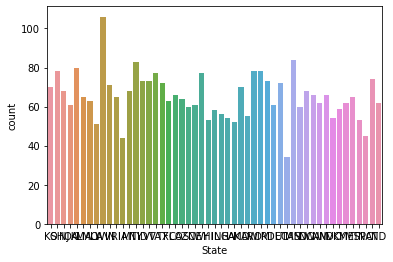

In [13]:
sns.countplot(df['State']);

Let's look at the 5 most popular States

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


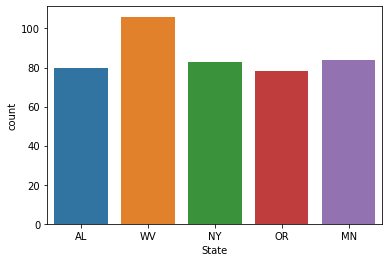

In [14]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State']);

## 3. Multivariate visualization

### 3.1 Quantitative–Quantitative

In [15]:
#at first let's see for all features in dataset
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

We need to find all columns which contain the word 'charge' to find any correlations between charges.

In [16]:
#new variable feat 
feat = [ f for f in df.columns if 'charge' in f]

In [17]:
#print out feat
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

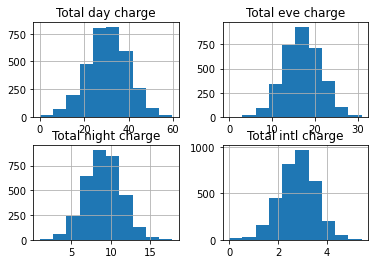

In [18]:
#building histograms for all properties
df[feat].hist(); 

Pairplot - just a beautiful plot for visualizing pairwise relationships in a dataset.

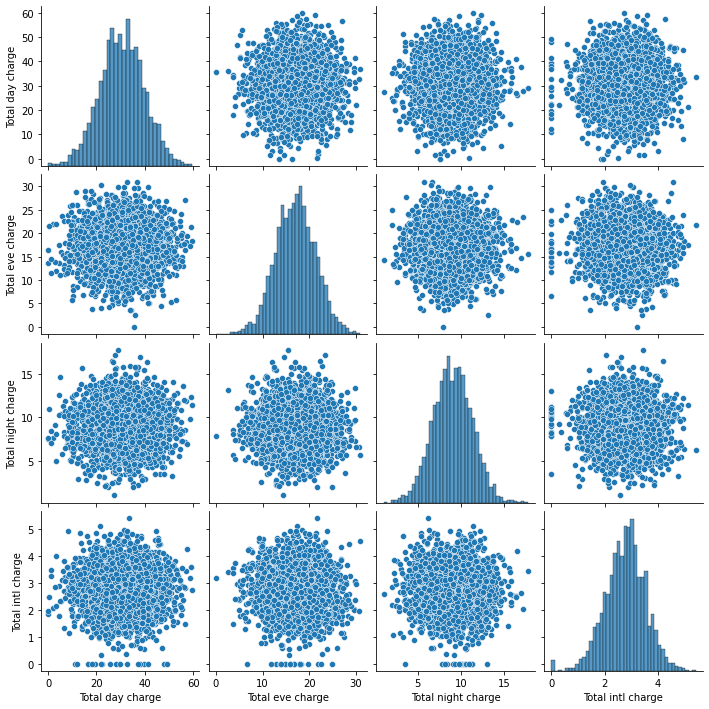

In [19]:
sns.pairplot(df[feat]);

### Scatterplot

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

Let's try out the function scatter() from the matplotlib library:

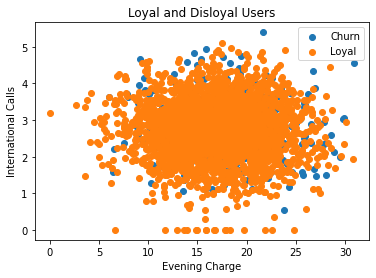

In [20]:
#Churn users dependency based on Total eve charge and Total international charge
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'], label= 'Churn');
# #Loyal users dependency based on Total eve charge and Total international charge
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'], label = 'Loyal');
# set xlabel for figure
plt.xlabel('Evening Charge');
# set y label for figure
plt.ylabel('International Calls');
#set figure title
plt.title('Loyal and Disloyal Users')
# add legend to plot
plt.legend();

method DataFrame.corr computes the pairwise correlation of columns

In [21]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Let's build a correlation diagram.

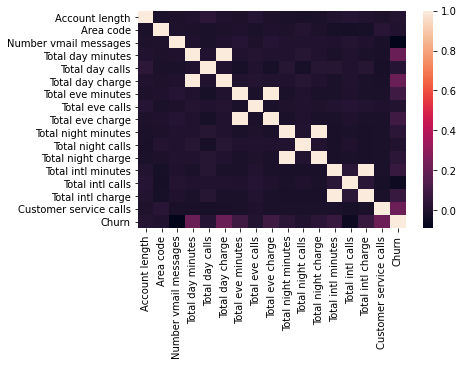

In [22]:
sns.heatmap(df.corr());

To delete some information from the dataframe you should use the drop() method with inplace argument as TRUE

In [23]:
df.drop?

In [24]:
df.drop(feat, axis = 1, inplace = True)

In [25]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

Now we've deleted highly correlated features and correlations have changed too.

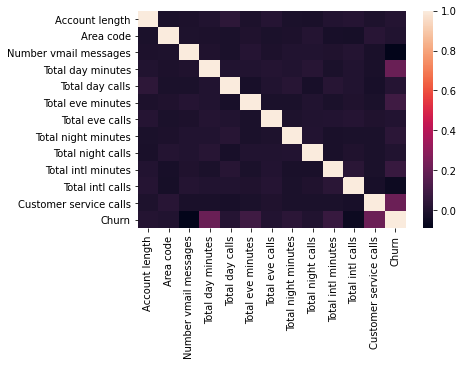

In [26]:
sns.heatmap(df.corr());

As we see,  the churn feature has a strong correlation with customer service calls but we don't have any information about causation. Good article about causation and correlation and the difference between them:
https://amplitude.com/blog/2017/01/19/causation-correlation?fbclid=IwAR1SimqD319O5wfTZwShs6NHQNL3RXfAHHTFhs4Crf6jzsjKZ0L22rBap9g

## 3.2 Quantitative–Categorical

A good way to research dependencies between quantitative and categorical features is boxplot building

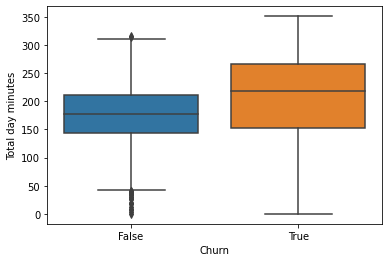

In [27]:
sns.boxplot(x='Churn', y = 'Total day minutes', data= df);

As we see the average value and the median value have a strong difference. Let's build boxplots for 'States' and 'Total day minutes'.  

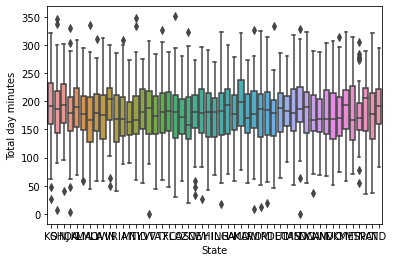

In [28]:
sns.boxplot(x='State', y = 'Total day minutes', data= df);

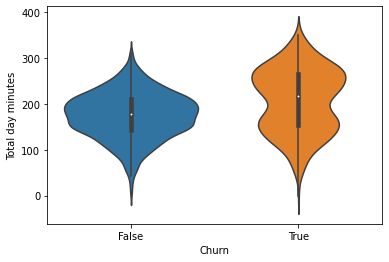

In [29]:
sns.violinplot(x='Churn', y = 'Total day minutes', data= df);

In [30]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

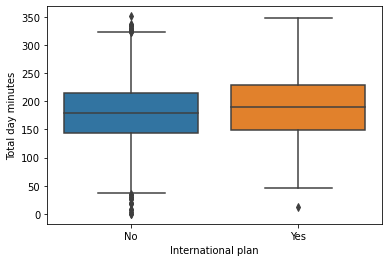

In [31]:
sns.boxplot(x='International plan', y = 'Total day minutes', data= df);

### 3.3 Categorical–Categorical

Contingency table.
In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a cross tabulation. It represents the multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

In [32]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


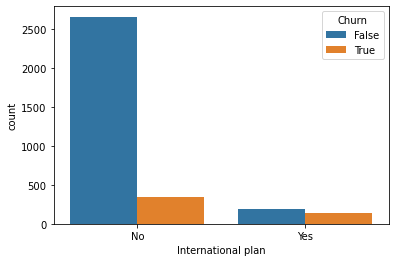

In [33]:
sns.countplot(x = 'International plan', hue = 'Churn', data = df);

Let's see how the churn feature depends on the quantity of customer service calls.

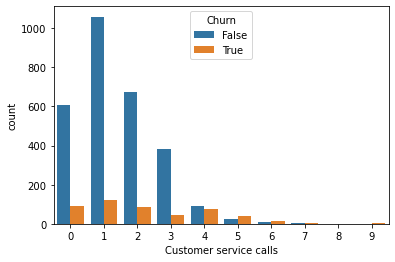

In [34]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df);